In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 아티스트와 타이틀을 분리하는 함수
def split_artist_title(text):
    # 다양한 구분자를 기반으로 분리를 시도
    for separator in [' / ', ' - ', '/', ' - ', '-']:
        if separator in text:
            return text.split(separator)
    return [text, '']  # 구분자가 없는 경우

In [3]:
# 사용자가 제공한 데이터
raw_data = [
    ["익명화A", "말하는대로 / 이적", "보컬", "보컬"],
    ["익명화B", "Tomboy / 혁오", "드럼", "드럼"],
    ["익명화C", "나에게로 떠나는 여행 / 최도준", "보컬", "보컬"],
    ["익명화D", "낭만젊음사랑 / 이세계", "베이스", "베이스"],
    ["익명화E", "뜨거운 여름밤은 가고 남은 건 볼품 없지만 / 잔나비", "보컬", "보컬"],
    ["익명화F", "어른 / 손디아", "보컬", "보컬"],
    ["익명화G", "후라이의 꿈 / 악동뮤지션", "보컬", "보컬"],
    ["익명화H", "민들레 (single ver.) / 우효", "베이스", "베이스"],
    ["익명화I", "비상 / 임재범", "보컬", "보컬"],
    ["익명화J", "퇴근하겠습니다 / 장미여관", "베이스", "베이스"],
    ["익명화K", "외딴섬 로맨틱 / 잔나비", "베이스", "베이스"],
    ["익명화L", "도망가자 / 선우정아", "보컬", "보컬"],
    ["익명화M", "가을우체국앞에서/윤도현(비긴어게인ver.)", "베이스", "보컬"],
    ["익명화N", "첫사랑 / 백아", "건반", "보컬"],
    ["익명화O", "한숨 / 이하이", "보컬", "보컬"],
    ["익명화P", "Complicated / Avril Lavigne", "보컬", "보컬"],
    ["익명화Q", "American Idiot / Green Day", "베이스", "베이스"]
]

# 데이터프레임 생성
df_origin = pd.DataFrame(raw_data, columns=["Name", "Title_Artist", "Main_Session", "Applied_Session"])

# 분리된 데이터를 저장할 리스트
artists = []
titles = []

# 각 문자열을 처리하여 아티스트와 타이틀을 분리
for item in df_origin['Title_Artist']:
    title, artist = split_artist_title(item)
    titles.append(title.strip())  # 공백 제거
    artists.append(artist.strip())  # 공백 제거

# "Title"과 "Artist" 열을 데이터프레임에 추가
df_origin['Title'] = titles
df_origin['Artist'] = artists

# 원래의 "Title_Artist" 열을 제거
df_origin = df_origin.drop(columns=['Title_Artist'])

df_origin


,Name,Main_Session,Applied_Session,Title,Artist
0,익명화A,보컬,보컬,말하는대로,이적
1,익명화B,드럼,드럼,Tomboy,혁오
2,익명화C,보컬,보컬,나에게로 떠나는 여행,최도준
3,익명화D,베이스,베이스,낭만젊음사랑,이세계
4,익명화E,보컬,보컬,뜨거운 여름밤은 가고 남은 건 볼품 없지만,잔나비
5,익명화F,보컬,보컬,어른,손디아
6,익명화G,보컬,보컬,후라이의 꿈,악동뮤지션
7,익명화H,베이스,베이스,민들레 (single ver.),우효
8,익명화I,보컬,보컬,비상,임재범
9,익명화J,베이스,베이스,퇴근하겠습니다,장미여관


In [4]:
# 메인 세션과 신청 세션의 일치 여부를 확인하는 함수
def check_session_match(row):
    if row['Main_Session'] == row['Applied_Session']:
        return 1  # 일치
    else:
        return 0  # 불일치

# 'Session_Match' 열을 데이터프레임에 추가
df_origin['Session_Match'] = df_origin.apply(check_session_match, axis=1)
df_origin

,Name,Main_Session,Applied_Session,Title,Artist,Session_Match
0,익명화A,보컬,보컬,말하는대로,이적,1
1,익명화B,드럼,드럼,Tomboy,혁오,1
2,익명화C,보컬,보컬,나에게로 떠나는 여행,최도준,1
3,익명화D,베이스,베이스,낭만젊음사랑,이세계,1
4,익명화E,보컬,보컬,뜨거운 여름밤은 가고 남은 건 볼품 없지만,잔나비,1
5,익명화F,보컬,보컬,어른,손디아,1
6,익명화G,보컬,보컬,후라이의 꿈,악동뮤지션,1
7,익명화H,베이스,베이스,민들레 (single ver.),우효,1
8,익명화I,보컬,보컬,비상,임재범,1
9,익명화J,베이스,베이스,퇴근하겠습니다,장미여관,1


In [5]:
plt.rcParams['font.family'] = 'AppleGothic'

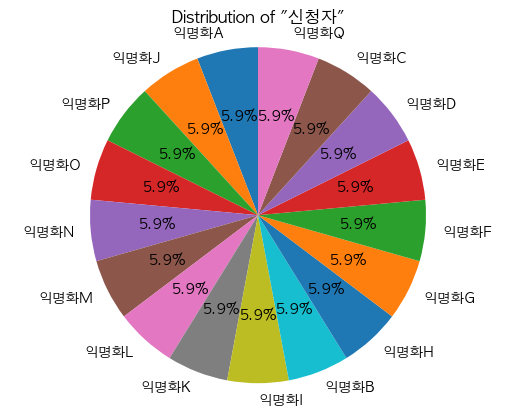

In [6]:
# 'Name_encoded' 열의 값 빈도를 계산
name_counts = df_origin['Name'].value_counts()

# 원그래프 생성
fig, ax = plt.subplots()
ax.pie(name_counts, labels=name_counts.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# 타이틀 설정
plt.title('Distribution of "신청자"')

# 그래프 표시
plt.show()


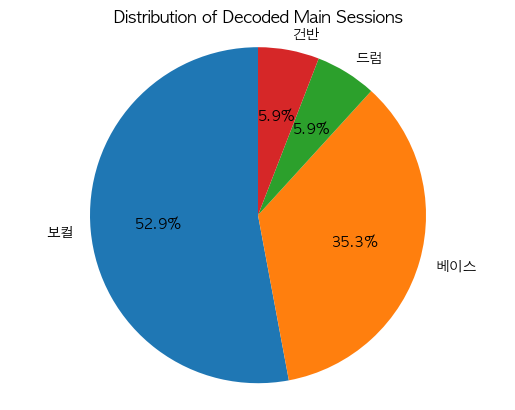

In [7]:
# 'Main_Session_encoded' 열의 값 빈도를 계산
main_session_encoded_counts = df_origin['Main_Session'].value_counts()

# 원그래프 생성
fig, ax = plt.subplots()
ax.pie(main_session_encoded_counts, labels=main_session_encoded_counts.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# 타이틀 설정
plt.title('Distribution of Decoded Main Sessions')

# 그래프 표시
plt.show()


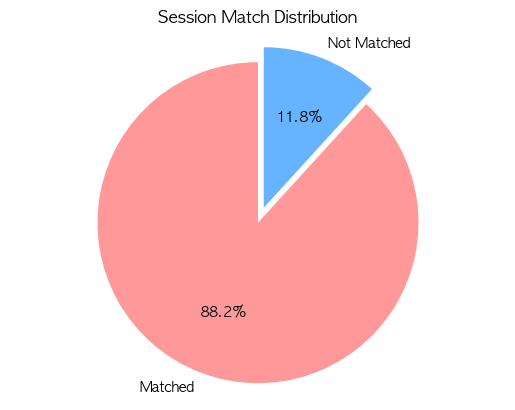

In [8]:
import matplotlib.pyplot as plt
import pandas as pd


# 'Session_Match'의 값 분포를 계산
match_counts = df_origin['Session_Match'].value_counts()

# 원 그래프를 그리기 위한 데이터 준비
labels = 'Matched', 'Not Matched'  # 라벨 수정 가능
sizes = [match_counts[1], match_counts[0]]  # 1과 0의 빈도
colors = ['#ff9999','#66b3ff']  # 색상 선택
explode = (0.1, 0)  # 첫 번째 조각이 돌출되도록 설정 (선택 사항)

# 원 그래프 생성
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# 원형 유지를 위한 설정
ax1.axis('equal')  

# 제목 추가
plt.title("Session Match Distribution")

# 그래프 표시
plt.show()


In [9]:
# 각 사용자가 선택한 노래 수 계산
song_counts = {person: len(songs) for person, songs in choices.items()}

song_counts

NameError: name 'choices' is not defined

# 개인

In [10]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 노래 리스트
songs = [
    "말하는대로", "Tomboy", "나에게로 떠나는 여행", "낭만젊음사랑", "뜨거운 여름밤은 가고 남은 건 볼품 없지만",
    "어른", "후라이의 꿈", "민들레", "비상", "퇴근하겠습니다",
    "외딴섬 로맨틱", "도망가자", "가을우체국앞에서", "첫사랑", "한숨",
    "Complicated", "American Idiot"
]

# 사용자별 선택한 노래
choices = {
    "익명 A": ["후라이의 꿈", "Complicated", "퇴근하겠습니다", "민들레", "Tomboy", "낭만젊음사랑", "어른", "첫사랑", "한숨", "도망가자"],
    "익명 B": ["Tomboy", "퇴근하겠습니다", "민들레", "어른", "도망가자", "첫사랑", "후라이의 꿈", "가을우체국앞에서", "뜨거운 여름밤은 가고 남은 건 볼품 없지만", "Complicated"],
    "익명 C": ["Tomboy", "어른", "후라이의 꿈", "민들레", "퇴근하겠습니다", "도망가자", "한숨", "뜨거운 여름밤은 가고 남은 건 볼품 없지만", "말하는대로", "외딴섬 로맨틱"],
    "익명 D": ["Tomboy", "낭만젊음사랑", "뜨거운 여름밤은 가고 남은 건 볼품 없지만", "어른", "민들레", "후라이의 꿈", "퇴근하겠습니다", "가을우체국앞에서", "첫사랑", "한숨"],
    "익명 E": ["Tomboy", "어른", "후라이의 꿈", "민들레", "퇴근하겠습니다", "외딴섬 로맨틱", "도망가자", "가을우체국앞에서", "첫사랑", "한숨"],
    "익명 F": ["Tomboy", "뜨거운 여름밤은 가고 남은 건 볼품 없지만", "어른", "후라이의 꿈", "민들레", "퇴근하겠습니다", "도망가자", "가을우체국앞에서", "첫사랑", "Complicated"],
    "익명 G": ["Tomboy", "어른", "후라이의 꿈", "민들레", "가을우체국앞에서", "첫사랑", "Complicated", "뜨거운 여름밤은 가고 남은 건 볼품없지만", "퇴근하겠습니다", "외딴섬 로맨틱"]
}


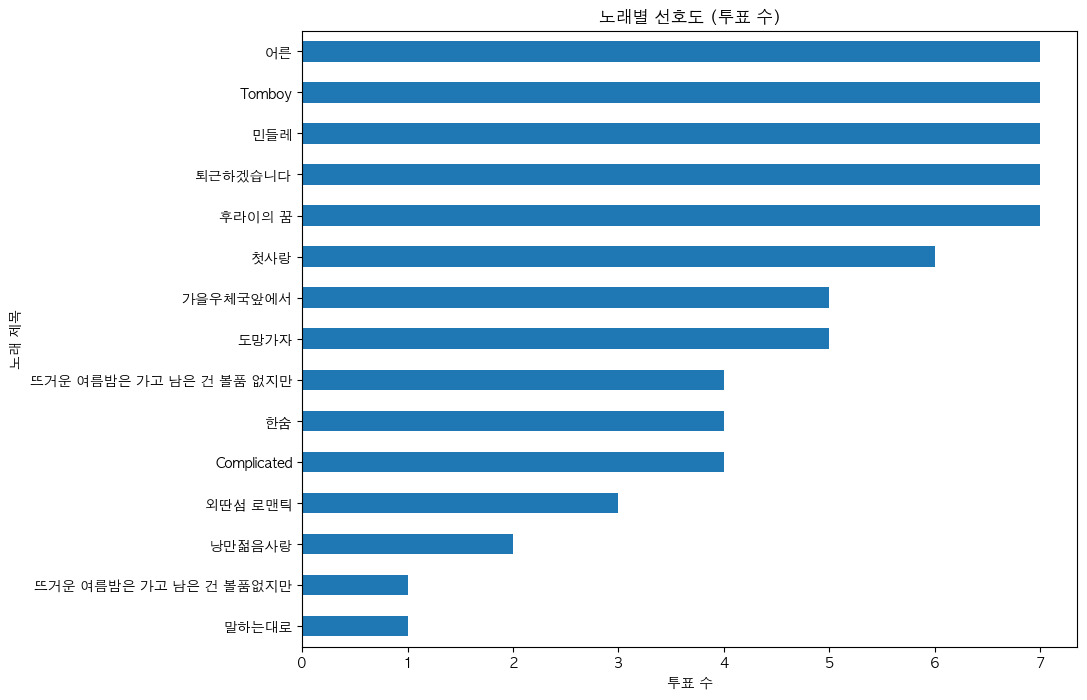

In [11]:
# 모든 선택을 하나의 리스트로 합칩니다.
all_choices = [choice for sublist in choices.values() for choice in sublist]

# 각 노래별로 얼마나 많이 선택되었는지 카운트합니다.
song_counts = pd.Series(all_choices).value_counts()

# 시각화
plt.figure(figsize=(10,8))
song_counts.sort_values().plot(kind='barh')
plt.xlabel('투표 수')
plt.ylabel('노래 제목')
plt.title('노래별 선호도 (투표 수)')
plt.show()

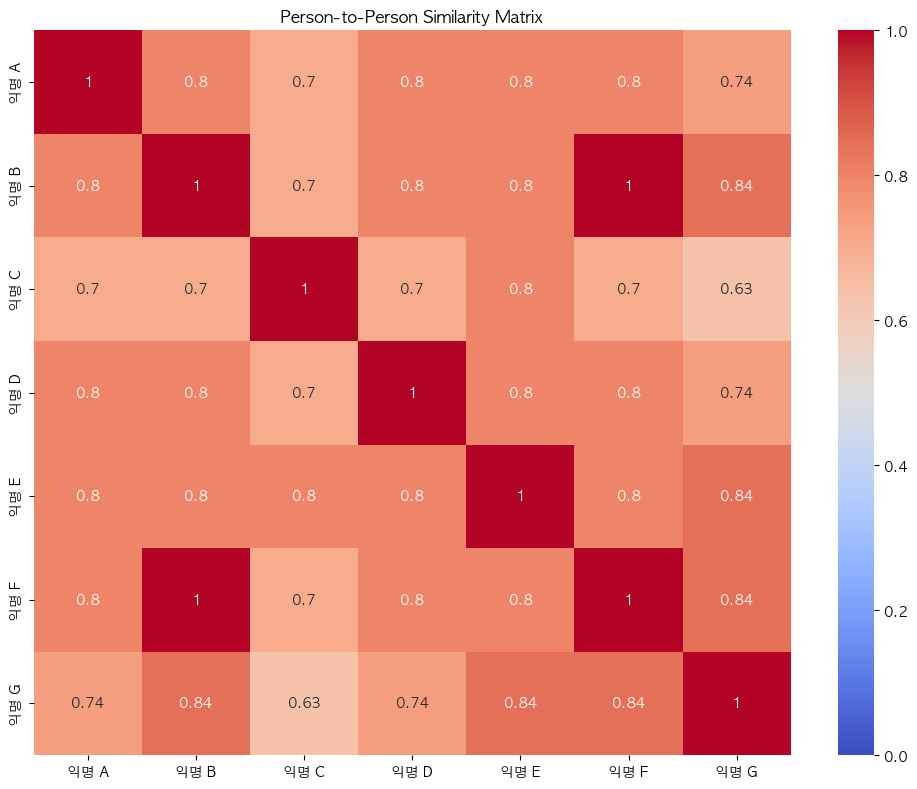

array([[1.        , 0.8       , 0.7       , 0.8       , 0.8       ,
        0.8       , 0.73786479],
       [0.8       , 1.        , 0.7       , 0.8       , 0.8       ,
        1.        , 0.84327404],
       [0.7       , 0.7       , 1.        , 0.7       , 0.8       ,
        0.7       , 0.63245553],
       [0.8       , 0.8       , 0.7       , 1.        , 0.8       ,
        0.8       , 0.73786479],
       [0.8       , 0.8       , 0.8       , 0.8       , 1.        ,
        0.8       , 0.84327404],
       [0.8       , 1.        , 0.7       , 0.8       , 0.8       ,
        1.        , 0.84327404],
       [0.73786479, 0.84327404, 0.63245553, 0.73786479, 0.84327404,
        0.84327404, 1.        ]])

In [12]:
# 노래-사람 매트릭스 생성
song_person_matrix = np.zeros((len(songs), len(choices)))  # len(choices)는 사람 수

for i, song in enumerate(songs):
    for j, person in enumerate(choices):
        if song in choices[person]:
            song_person_matrix[i][j] = 1

# 코사인 유사도 계산
similarity = cosine_similarity(song_person_matrix.T)  # .T는 행렬을 전치합니다 (열을 행으로)

# 유사도 매트릭스 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(similarity, annot=True, cmap='coolwarm', 
            xticklabels=list(choices.keys()), yticklabels=list(choices.keys()),
            vmin=0, vmax=1)  # 유사도는 0과 1 사이의 값

plt.title('Person-to-Person Similarity Matrix')
plt.tight_layout()
plt.show()

# 결과 유사도 매트릭스 반환
similarity

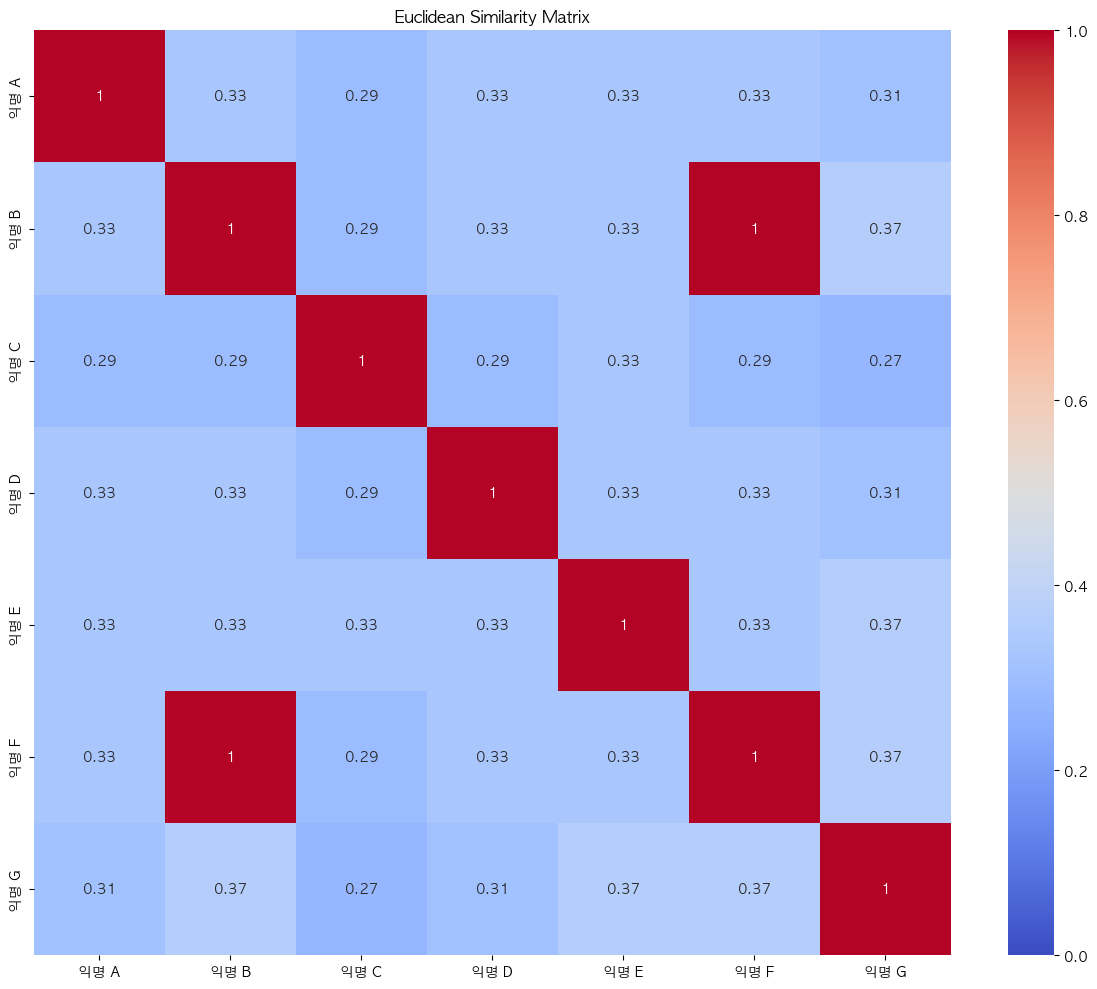

array([[1.        , 0.33333333, 0.28989795, 0.33333333, 0.33333333,
        0.33333333, 0.30901699],
       [0.33333333, 1.        , 0.28989795, 0.33333333, 0.33333333,
        1.        , 0.3660254 ],
       [0.28989795, 0.28989795, 1.        , 0.28989795, 0.33333333,
        0.28989795, 0.27429189],
       [0.33333333, 0.33333333, 0.28989795, 1.        , 0.33333333,
        0.33333333, 0.30901699],
       [0.33333333, 0.33333333, 0.33333333, 0.33333333, 1.        ,
        0.33333333, 0.3660254 ],
       [0.33333333, 1.        , 0.28989795, 0.33333333, 0.33333333,
        1.        , 0.3660254 ],
       [0.30901699, 0.3660254 , 0.27429189, 0.30901699, 0.3660254 ,
        0.3660254 , 1.        ]])

In [13]:
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np

# 유클리드 거리 계산
distances = euclidean_distances(song_person_matrix.T)

# 유클리드 거리를 기반으로 한 유사도 계산 (값이 클수록 더 비슷함)
euclidean_similarity = 1 / (1 + distances)  # 거리가 0일 때 유사도는 1이 되며, 거리가 커질수록 유사도는 0에 가까워짐

# 유사도 매트릭스 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(euclidean_similarity, annot=True, cmap='coolwarm', 
            xticklabels=list(choices.keys()), yticklabels=list(choices.keys()),
            vmin=0, vmax=1)  # 유사도는 0과 1 사이의 값

plt.title('Euclidean Similarity Matrix')
plt.tight_layout()
plt.show()

# 결과 유사도 매트릭스 반환
euclidean_similarity


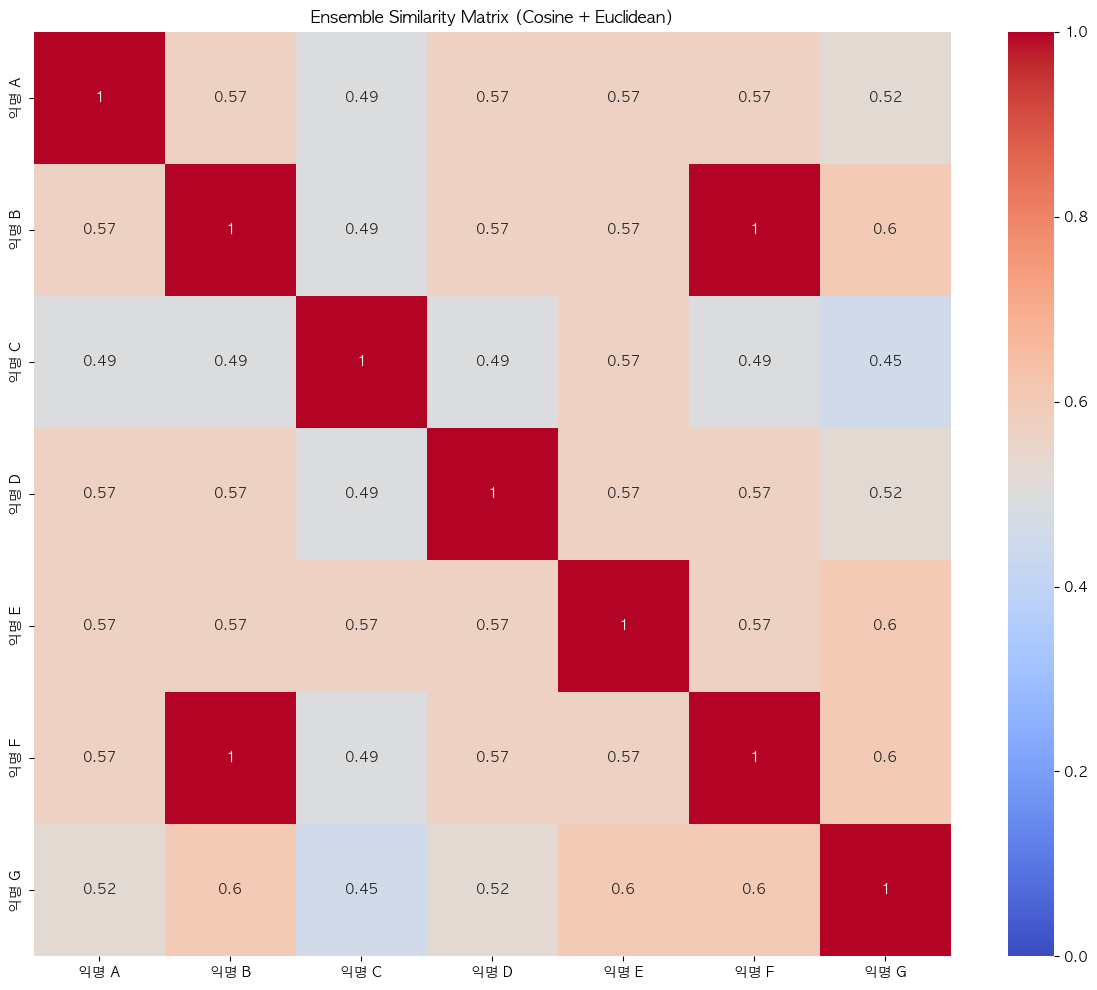

array([[1.        , 0.56666667, 0.49494897, 0.56666667, 0.56666667,
        0.56666667, 0.52344089],
       [0.56666667, 1.        , 0.49494897, 0.56666667, 0.56666667,
        1.        , 0.60464972],
       [0.49494897, 0.49494897, 1.        , 0.49494897, 0.56666667,
        0.49494897, 0.45337371],
       [0.56666667, 0.56666667, 0.49494897, 1.        , 0.56666667,
        0.56666667, 0.52344089],
       [0.56666667, 0.56666667, 0.56666667, 0.56666667, 1.        ,
        0.56666667, 0.60464972],
       [0.56666667, 1.        , 0.49494897, 0.56666667, 0.56666667,
        1.        , 0.60464972],
       [0.52344089, 0.60464972, 0.45337371, 0.52344089, 0.60464972,
        0.60464972, 1.        ]])

In [14]:
# 코사인 유사도와 유클리드 유사도의 평균을 계산하여 앙상블 유사도를 생성합니다.
ensemble_similarity = (similarity + euclidean_similarity) / 2

# 앙상블 유사도 매트릭스 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(ensemble_similarity, annot=True, cmap='coolwarm', 
            xticklabels=list(choices.keys()), yticklabels=list(choices.keys()),
            vmin=0, vmax=1)  # 유사도는 0과 1 사이의 값

plt.title('Ensemble Similarity Matrix (Cosine + Euclidean)')
plt.tight_layout()
plt.show()

# 앙상블 유사도 매트릭스 반환
ensemble_similarity


/Users/being/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


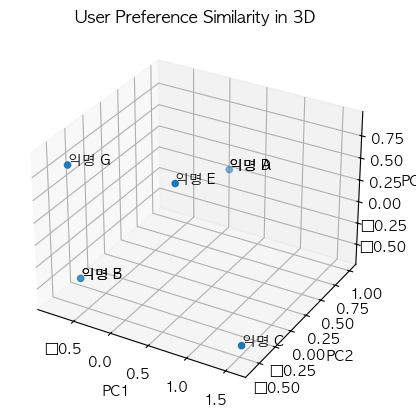

In [19]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 노래 리스트와 사용자별 선택한 노래 데이터는 위에서 이미 정의했다고 가정합니다.

# 사용자-노래 매트릭스를 초기화합니다.
user_song_matrix = pd.DataFrame(index=choices.keys(), columns=songs).fillna(0)

for user, user_choices in choices.items():
    for song in user_choices:
        if song in songs:  # 이 부분이 노래가 노래 리스트에 있는지 확인합니다.
            user_song_matrix.loc[user, song] = 1

# PCA로 차원 축소
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(user_song_matrix)

# 3D 그래프로 표현
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs, ys, zs = reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2]

ax.scatter(xs, ys, zs)

for i, user in enumerate(choices.keys()):
    ax.text(xs[i], ys[i], zs[i], user)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('User Preference Similarity in 3D')
plt.show()